# Color Threshold, Blue Screen

### Import resources

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib inline

### Read in and display the image

In [2]:
IMG = '../../img'

In [3]:
image = cv2.imread(f'{IMG}/pizza_bluescreen.jpg')
print(f'This image is: {type(image)}, with dimensions: {image.shape}')

This image is: <class 'numpy.ndarray'>, with dimensions: (514, 816, 3)


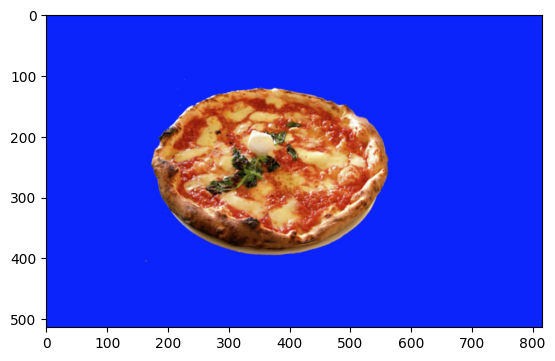

In [5]:
image_copy = np.copy(image)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)
plt.imshow(image_copy);

### Define the color threshold

In [10]:
lower_blue = np.array([0, 0, 200]) 
upper_blue = np.array([70, 70, 255])

### Create a mask

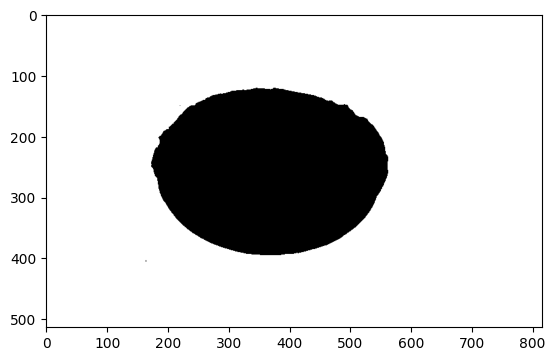

In [11]:
mask = cv2.inRange(image_copy, lower_blue, upper_blue)
plt.imshow(mask, cmap='gray');

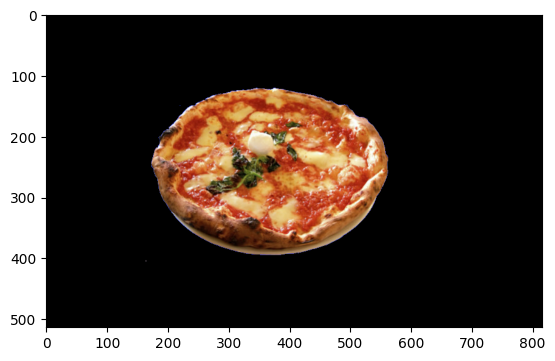

In [12]:
masked_image = np.copy(image_copy)
masked_image[mask != 0] = [0, 0, 0]
plt.imshow(masked_image);

### Mask and add a background image

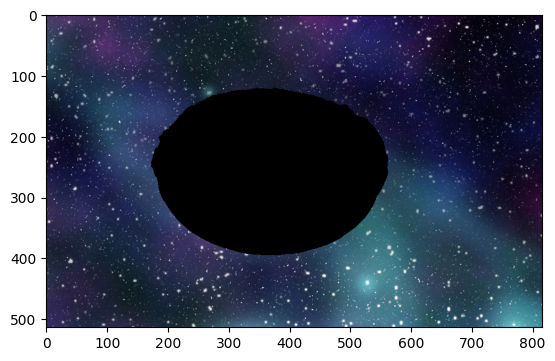

In [14]:
background_image = cv2.imread(f'{IMG}/space_background.jpg')
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)
crop_background = background_image[:image.shape[0], :image.shape[1]]
crop_background[mask == 0] = [0, 0, 0]
plt.imshow(crop_background);

### Create a complete image

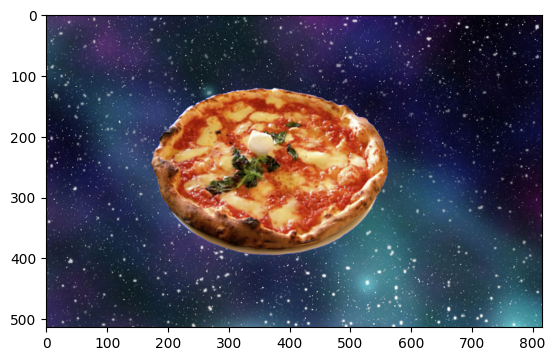

In [15]:
complete_image = masked_image + crop_background
plt.imshow(complete_image);